In [21]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import koreanize_matplotlib

In [22]:
url2='https://finance.naver.com/item/coinfo.naver?code=066570'
driver = webdriver.Chrome()  # 웹 드라이버 선택 (예: Chrome)
driver.get(url2)  # 접근할 웹 페이지의 URL 입력

driver.switch_to.frame("coinfo_cp") # iframe 내부로 전환

html = driver.page_source
soup =BeautifulSoup(html,'html.parser')
tbody_tag = soup.find_all('tbody')
tbody_tag


[<tbody><tr class="cmp-table-row">
 <td class="cmp-table-cell td0101">
 <dl>
 <dt>
 <span class="name">LG전자</span>
 <a class="cEm" href="http://www.lge.co.kr" target="comPage" title="[홈페이지] www.lge.co.kr"><img align="absmiddle" hspace="3" src="/images/icon_home.gif"/></a>
 <a class="cEm" title="[대표전화] 02-3777-1114 
 [주식담당] 02-3777-1114"><img align="absmiddle" hspace="1" src="/images/icon_tel.gif"/></a>
 <b class="num">066570</b>
 </dt>
 <dt class="line-left">LGELECTRONICS</dt>
 <dt class="line-left">KOSPI : 전기전자</dt>
 <dt class="line-left">WICS : 전자제품</dt>
 </dl>
 </td>
 </tr>
 <tr class="cmp-table-row">
 <td class="cmp-table-cell td0201">
 <div> </div>
 </td>
 </tr>
 <tr class="cmp-table-row">
 <td class="cmp-table-cell td0301">
 <dl>
 <dt>EPS <b class="num">3,962</b></dt>
 <dt class="line-left">BPS <b class="num">113,802</b></dt>
 <dt class="line-left">PER <b class="num">24.13</b></dt>
 <dt class="line-left">업종PER <b class="num">25.99</b></dt>
 <dt class="line-left">PBR <b class="num

In [23]:
text_data = tbody_tag[17].text
text_data

'\n2021(A)\n739,080\n27.30\n40,580\n10,317\n5,705\n24.19\n1.44\n6.32\n4.18\n23.32\nIFRS연결\n2022(A)\n834,673\n12.93\n35,510\n11,964\n6,616\n13.07\n0.82\n6.61\n3.14\n25.11\nIFRS연결\n2023(A)\n842,278\n0.91\n35,491\n7,129\n3,942\n25.82\n0.93\n3.69\n3.45\n25.22\nIFRS연결\n2024(E)\n888,160\n5.45\n43,361\n19,271\n10,656\n8.97\n0.80\n9.33\n2.74\n21.68\nIFRS연결\n2025(E)\n934,972\n5.27\n47,387\n24,622\n13,616\n7.02\n0.72\n10.81\n2.43\n12.69\nIFRS연결\n\n'

In [24]:
# 정규식으로 데이터 쪼개기
item_list = []
remove_span = re.split(r'\n|\n', text_data)
for word in remove_span:
    if word !='':
        item_list.append(word)

item_list

['2021(A)',
 '739,080',
 '27.30',
 '40,580',
 '10,317',
 '5,705',
 '24.19',
 '1.44',
 '6.32',
 '4.18',
 '23.32',
 'IFRS연결',
 '2022(A)',
 '834,673',
 '12.93',
 '35,510',
 '11,964',
 '6,616',
 '13.07',
 '0.82',
 '6.61',
 '3.14',
 '25.11',
 'IFRS연결',
 '2023(A)',
 '842,278',
 '0.91',
 '35,491',
 '7,129',
 '3,942',
 '25.82',
 '0.93',
 '3.69',
 '3.45',
 '25.22',
 'IFRS연결',
 '2024(E)',
 '888,160',
 '5.45',
 '43,361',
 '19,271',
 '10,656',
 '8.97',
 '0.80',
 '9.33',
 '2.74',
 '21.68',
 'IFRS연결',
 '2025(E)',
 '934,972',
 '5.27',
 '47,387',
 '24,622',
 '13,616',
 '7.02',
 '0.72',
 '10.81',
 '2.43',
 '12.69',
 'IFRS연결']

In [25]:
# value_dict 만들기
value_dict = {'영업이익':[item_list[3],item_list[15],item_list[27]],
              'PER':[item_list[6],item_list[18],item_list[30]],
              'PBR':[item_list[7],item_list[19],item_list[31]],
              'ROE':[item_list[8],item_list[20],item_list[21]]}
value_dict

{'영업이익': ['40,580', '35,510', '35,491'],
 'PER': ['24.19', '13.07', '25.82'],
 'PBR': ['1.44', '0.82', '0.93'],
 'ROE': ['6.32', '6.61', '3.14']}

In [26]:
print(value_dict)
value_DF=pd.DataFrame(value_dict,index=['2021','2022','2023'])
value_DF


{'영업이익': ['40,580', '35,510', '35,491'], 'PER': ['24.19', '13.07', '25.82'], 'PBR': ['1.44', '0.82', '0.93'], 'ROE': ['6.32', '6.61', '3.14']}


,영업이익,PER,PBR,ROE
2021,"40,580",24.19,1.44,6.32
2022,"35,510",13.07,0.82,6.61
2023,"35,491",25.82,0.93,3.14


In [27]:
value_DF['영업이익'] = value_DF['영업이익'].str.replace(',', '')
value_DF=value_DF.astype(float)


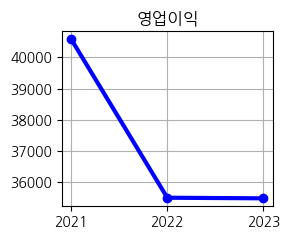

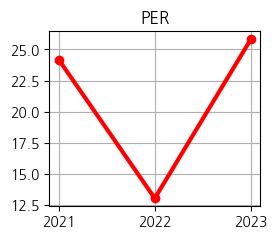

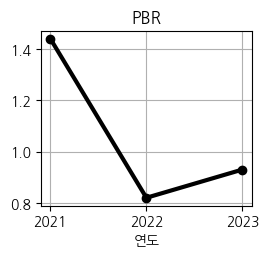

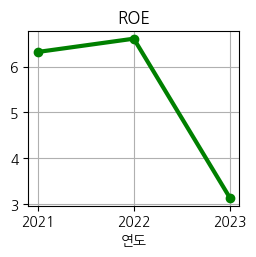

In [35]:
j=1
color=['blue', 'red', 'black', 'green']
for i in value_DF.columns:
    plt.figure(figsize=(6,5))
    plt.subplot(2,2,j)
    plt.plot(value_DF[f'{i}'], marker='o',color=color[j-1],linewidth=3)
    j +=1
    # 그래프 설정
    plt.title(f'{i}')
    if j>3:
        plt.xlabel('연도')
    plt.grid(True)

    # 그래프 출력
    plt.show()